In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

class OneVsAll:
    def __init__(self):
        self.binary_clf = dict()

    def fit(self, x, y):
        for class_value in pd.unique(y):
            y_new = np.where(y!=class_value, -1, y)
            y_new = np.where(y_new==class_value, 1, y_new)

            clf = LogisticRegression(random_state=0).fit(x, y_new)
            self.binary_clf[class_value] = clf

    def predict_prob(self, x):
        probs = dict()
        for class_value, clf in self.binary_clf.items():
            probs[class_value] = clf.predict_proba(x)[:, 1]

        return probs

    def predict(self, x):
        ans = np.empty(shape=x.shape[0])
        for i in range(x.shape[0]):
            d = self.predict_prob(x[i, :].reshape(1, -1))
            ans[i] = max(d, key=d.get)

        return ans


In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

mnist = datasets.load_digits()

X, y = mnist["data"], mnist["target"]
X, X_test, y, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [4]:
clf = OneVsAll()
clf.fit(X, y)
print(clf.predict(X_test))
print(y_test)

/home/raha/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/raha/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[7. 3. 7. 7. 4. 1. 5. 3. 0. 2. 6. 7. 5. 3. 9. 7. 9. 4. 6. 3. 5. 3. 2. 6.
 4. 0. 0. 5. 5. 2. 1. 2. 0. 6. 5. 6. 7. 5. 3. 1. 1. 4. 7. 8. 4. 3. 8. 1.
 2. 6. 5. 2. 6. 4. 7. 7. 1. 4. 9. 0. 0. 3. 1. 5. 9. 9. 3. 7. 0. 9. 0. 2.
 6. 9. 9. 6. 2. 3. 0. 3. 6. 3. 5. 4. 8. 7. 7. 9. 9. 6. 4. 9. 8. 3. 1. 2.
 6. 9. 3. 6. 0. 9. 9. 0. 9. 9. 0. 4. 8. 3. 7. 8. 2. 0. 2. 7. 6. 2. 2. 6.
 8. 4. 6. 7. 5. 6. 0. 0. 1. 9. 5. 1. 1. 0. 7. 3. 2. 5. 0. 2. 8. 6. 3. 3.
 9. 4. 3. 0. 8. 2. 1. 0. 0. 1. 1. 2. 4. 9. 3. 2. 2. 7. 5. 7. 4. 8. 8. 3.
 8. 3. 9. 4. 5. 8. 2. 9. 7. 4. 8. 3. 4. 1. 8. 8. 8. 1. 3. 1. 4. 1. 8. 1.
 2. 7. 0. 3. 4. 3. 6. 9. 0. 4. 7. 5. 6. 0. 3. 7. 8. 4. 9. 0. 8. 8. 0. 5.
 1. 3. 2. 1. 3. 8. 2. 1. 7. 4. 3. 4. 3. 6. 4. 9. 6. 8. 6. 7. 8. 8. 4. 8.
 1. 8. 5. 3. 2. 5. 2. 9. 6. 1. 1. 2. 9. 6. 2. 0. 3. 2. 8. 4. 7. 0. 6. 6.
 4. 5. 5. 7. 7. 5. 4. 1. 5. 1. 8. 2. 4. 1. 2. 1. 5. 3. 4. 3. 6. 7. 8. 1.
 6. 5. 7. 0. 5. 0. 1. 8. 4. 6. 6. 6. 7. 9. 8. 0. 8. 2. 3. 8. 3. 5. 1. 5.
 5. 5. 3. 0. 3. 9. 4. 7. 6. 7. 9. 5. 9. 2. 4. 0. 6.

In [5]:
from sklearn.metrics import mean_squared_error

y_train_pred = clf.predict(X)
train_err = mean_squared_error(y, y_train_pred)
print("train error= ", train_err)

y_test_pred = clf.predict(X_test)
test_err = mean_squared_error(y_test, y_test_pred)
print("test error= ", test_err)

train error=  0.18232428670842032
test error=  0.8638888888888889


In [10]:
from sklearn.metrics import confusion_matrix

print("train confusion matrix")
print(confusion_matrix(y, y_train_pred))

print("test confusion matrix")
print(confusion_matrix(y_test, y_test_pred))

train confusion matrix
[[142   0   0   0   0   0   0   0   0   0]
 [  0 144   0   0   0   0   0   0   1   1]
 [  0   0 142   0   0   0   0   0   0   0]
 [  0   0   0 146   0   0   0   0   0   0]
 [  0   0   0   0 145   0   0   0   0   0]
 [  0   0   0   0   0 145   0   0   0   0]
 [  0   0   0   0   0   0 145   0   0   0]
 [  0   0   0   0   0   0   0 143   0   0]
 [  0   3   0   0   0   0   0   0 135   1]
 [  0   0   0   0   0   0   0   0   1 143]]
test confusion matrix
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  2  0  0  0  0  2  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 0  0  0  1  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  2]
 [ 0  1  1  1  0  0  0  0 32  0]
 [ 0  0  0  1  0  0  0  0  2 33]]


y_pred 7.0 / y_org 7


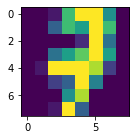

y_pred 3.0 / y_org 3


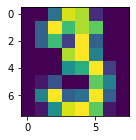

y_pred 7.0 / y_org 7


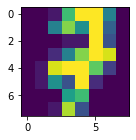

y_pred 7.0 / y_org 7


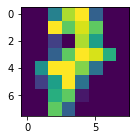

y_pred 4.0 / y_org 4


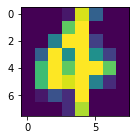

y_pred 1.0 / y_org 1


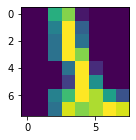

y_pred 5.0 / y_org 5


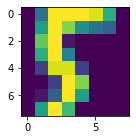

y_pred 3.0 / y_org 3


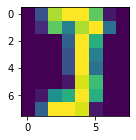

y_pred 0.0 / y_org 0


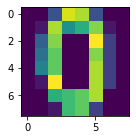

y_pred 2.0 / y_org 2


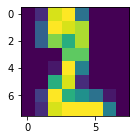

y_pred 6.0 / y_org 6


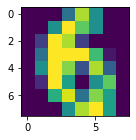

y_pred 7.0 / y_org 7


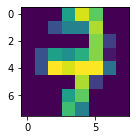

y_pred 5.0 / y_org 5


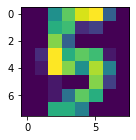

y_pred 3.0 / y_org 3


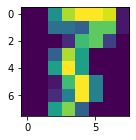

y_pred 9.0 / y_org 9


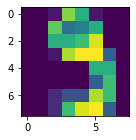

y_pred 7.0 / y_org 7


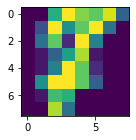

y_pred 9.0 / y_org 9


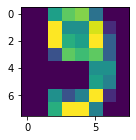

y_pred 4.0 / y_org 4


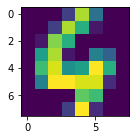

y_pred 6.0 / y_org 6


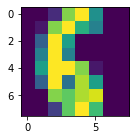

y_pred 3.0 / y_org 3


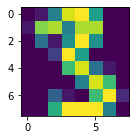

y_pred 5.0 / y_org 5


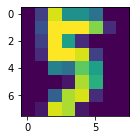

y_pred 3.0 / y_org 3


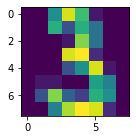

y_pred 2.0 / y_org 2


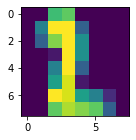

y_pred 6.0 / y_org 6


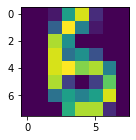

y_pred 4.0 / y_org 4


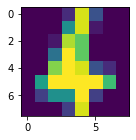

In [12]:
import matplotlib.pyplot as plt

for i in range(25):
    print("y_pred {} / y_org {}".format(y_test_pred[i], y_test[i]))
    plt.figure(figsize=(2, 2))

    plt.imshow(X_test[i,:].reshape(8,8))
    plt.show()


If I want to compare logistic regression with KNN I can say that KNN has a better performance but takes more time to give answer

Assume that our dataset has 4 classes and we have 100 samples in each class so we should train 4 binary classifiers and in each one the dataset has 100 samples labeled positive and 300 samples labeled negative so each time we are facing an imbalanced dataset.
To solve the problem I think we can use generative models which learn each class independently instead of discrimination.